# ☁️ Climate Change Modeling Project🌡️

In [ ]:
import pandas as pd

# Load dataset
file_path = "D:/PROGRAMMING LANGUAGES/PYTHON/JUPYTER NOTEBOOK/streamlit/Climate Project/climate_nasa.csv"
df = pd.read_csv(file_path)

# Dataset overview
dataset_info = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "First Rows": df.head(),
    "Data Types": df.dtypes
}
dataset_info

['date', 'likesCount', 'profileName', 'commentsCount', 'text']

## Find and Plot missing values

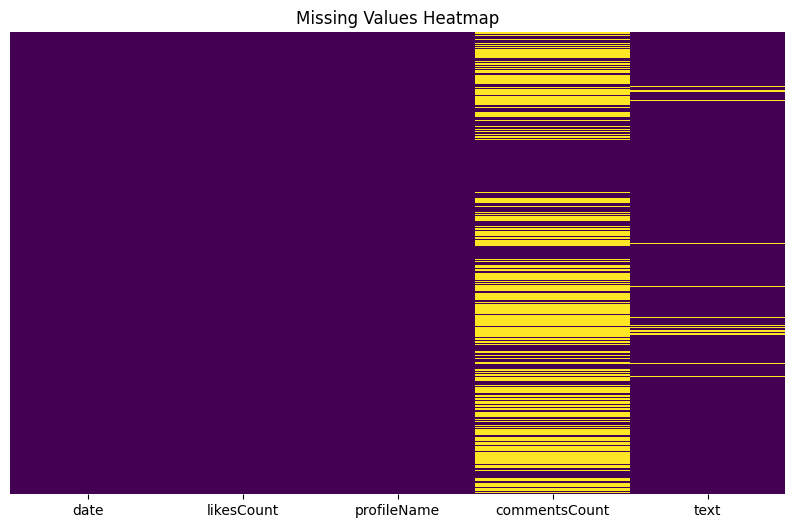

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()

# Plot missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Display missing values count
missing_values


## Handling missing values


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB
None

Missing Values Before Handling:
date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64


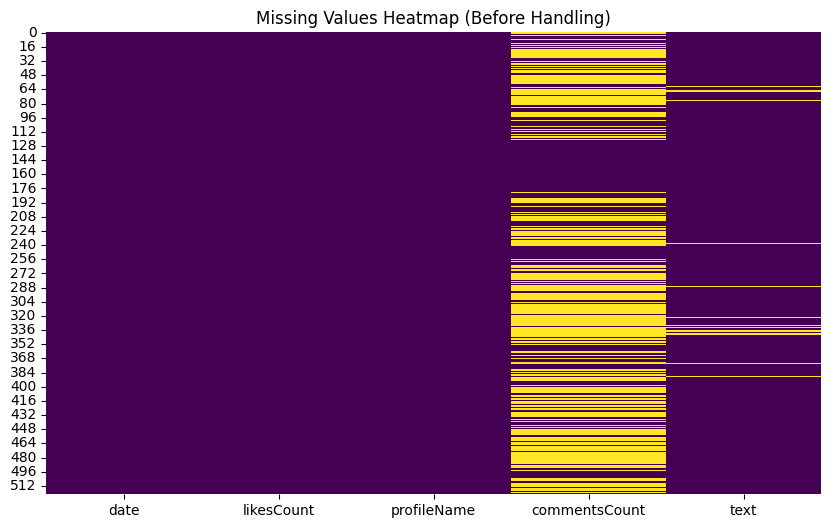

C:\Users\varsh\AppData\Local\Temp\ipykernel_18016\874140962.py:22: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method="linear", inplace=True)  # For numerical columns
C:\Users\varsh\AppData\Local\Temp\ipykernel_18016\874140962.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill for categorical/text columns



Missing Values After Handling:
date             0
likesCount       0
profileName      0
commentsCount    2
text             0
dtype: int64


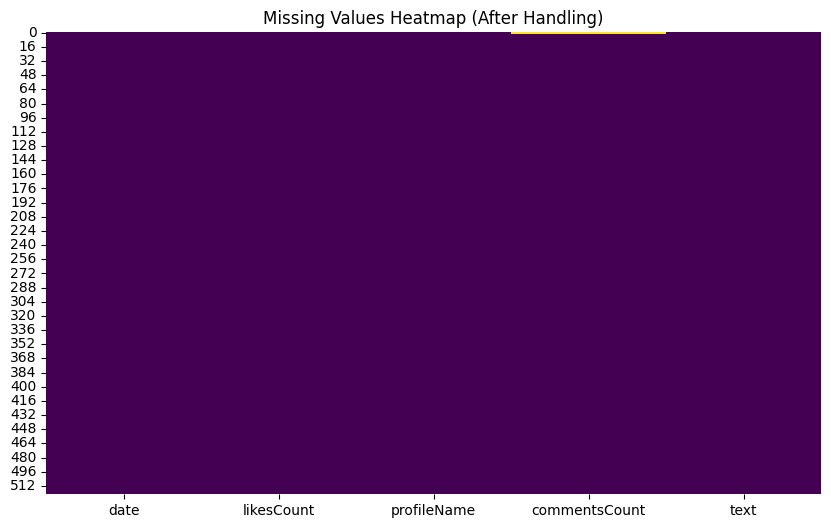

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "D:/PROGRAMMING LANGUAGES/PYTHON/JUPYTER NOTEBOOK/streamlit/Climate Project/climate_nasa.csv"
df = pd.read_csv(file_path)

# Dataset Overview
print("\nDataset Overview:")
print(df.info())
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Plot Missing Values Before Handling
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap (Before Handling)")
plt.show()

# Handling Missing Values
df.interpolate(method="linear", inplace=True)  # For numerical columns
df.fillna(method="ffill", inplace=True)  # Forward fill for categorical/text columns

# Verify Missing Values After Handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# Plot Heatmap After Handling
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap (After Handling)")
plt.show()


### Handling remaining missing values

In [11]:
df['commentsCount'] = pd.to_numeric(df['commentsCount'], errors='coerce')

df['commentsCount'] = df['commentsCount'].interpolate(method="linear")

df['commentsCount'].fillna(df['commentsCount'].median(), inplace=True)

print("\nMissing Values After Final Handling:")
print(df.isnull().sum())


Missing Values After Final Handling:
date             0
likesCount       0
profileName      0
commentsCount    0
text             0
dtype: int64


C:\Users\varsh\AppData\Local\Temp\ipykernel_18016\2261018443.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['commentsCount'].fillna(df['commentsCount'].median(), inplace=True)


## Exploratory Data Analysis📊📈

### Summary Statistics

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ Summary Statistics
print("\n🔹 Dataset Overview:")
print(df.info())
print("\n🔹 Descriptive Statistics:")
print(df.describe())


🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  522 non-null    float64
 4   text           522 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB
None

🔹 Descriptive Statistics:
       likesCount  commentsCount
count  522.000000     522.000000
mean     4.720307       7.801724
std     12.053556      10.513896
min      0.000000       1.000000
25%      0.000000       2.000000
50%      1.000000       4.000000
75%      4.000000       9.000000
max    126.000000      93.000000


### # 2️⃣ Missing Values Heatmap

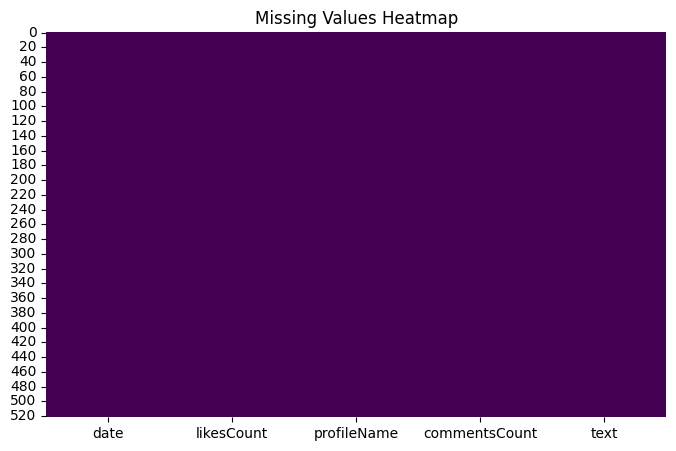

In [14]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### Correlation Heatmap

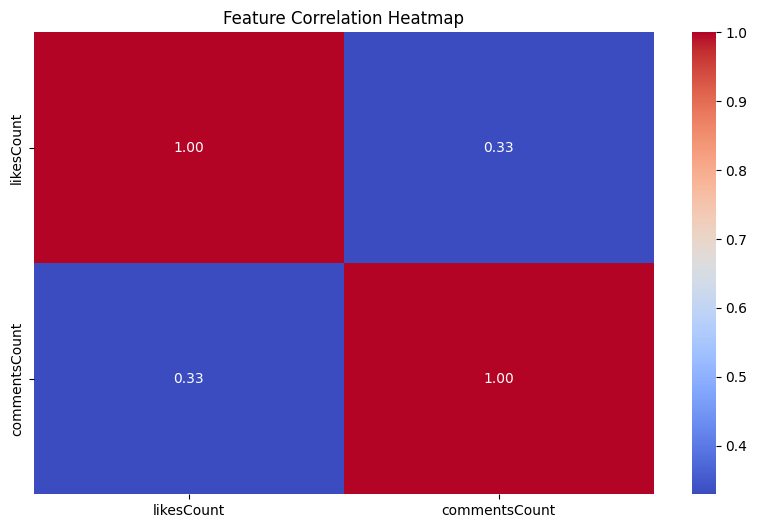

In [15]:
num_df = df.select_dtypes(include=['number'])

# Generate Heatmap only if numeric columns exist
if not num_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.savefig("correlation_heatmap.png")
    plt.show()
else:
    print("⚠ No numerical columns found for correlation heatmap.")

### Feature Distribution

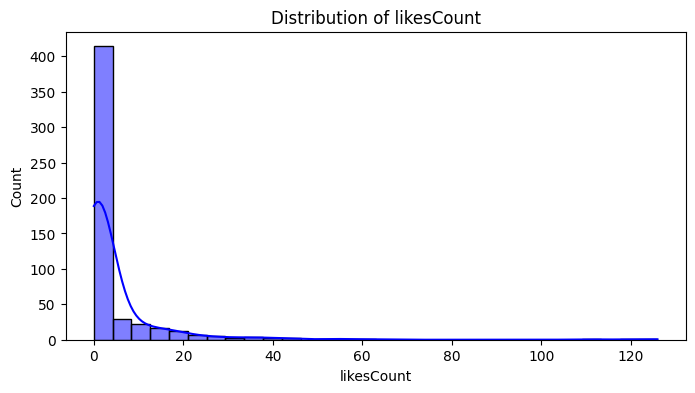

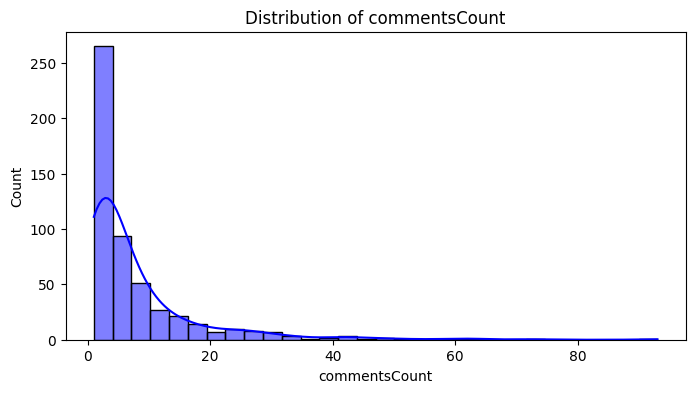

In [16]:
num_cols = ['likesCount', 'commentsCount']  # Change as per dataset
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

### Time-Series Analysis (If 'date' column exists)

C:\Users\varsh\AppData\Local\Temp\ipykernel_18016\2180559823.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['likesCount'].resample('M').mean().plot()  # Monthly avg


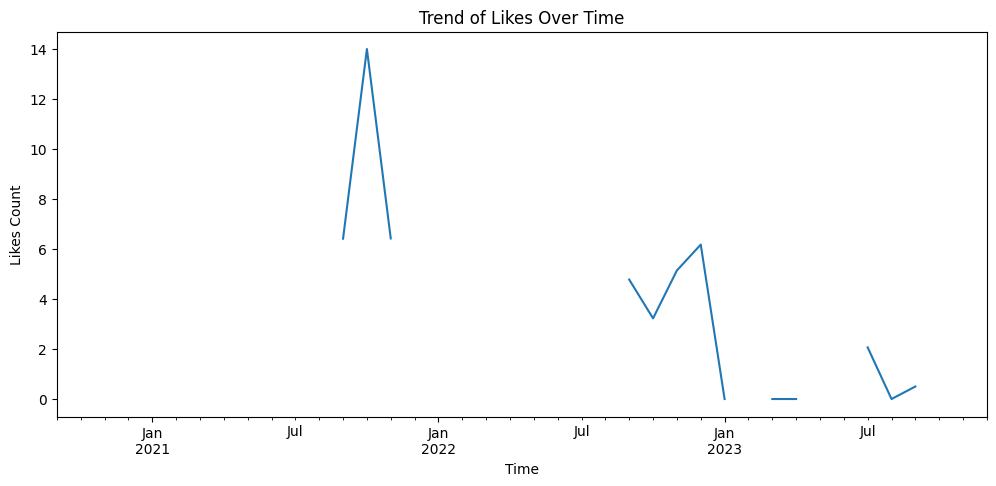

In [17]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])  # Convert to datetime
    df.set_index('date', inplace=True)
    plt.figure(figsize=(12, 5))
    df['likesCount'].resample('M').mean().plot()  # Monthly avg
    plt.title("Trend of Likes Over Time")
    plt.xlabel("Time")
    plt.ylabel("Likes Count")
    plt.show()

### Outlier Detection using Boxplots

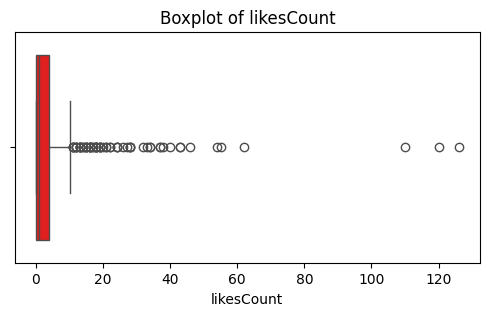

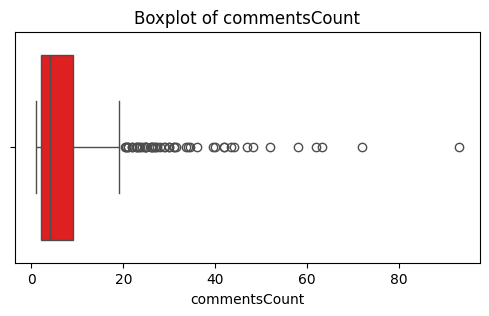

✅ EDA Completed!!


In [18]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color="red")
    plt.title(f"Boxplot of {col}")
    plt.show()

print("✅ EDA Completed!!")


### Creating New Features

In [22]:
# Convert 'date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Sort dataset by date
df = df.sort_values(by='date')


### Model Training


🔹 Random Forest Performance:
MAE: 0.01
RMSE: 0.07
R² Score: 0.99
Epoch 1/20


c:\Users\varsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step - loss: 0.8985
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - loss: 1.2786
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - loss: 1.1388
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - loss: 1.0260
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - loss: 0.7077
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - loss: 2.1910
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.8236
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - loss: 1.1991
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - loss: 1.2082
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - loss: 0.7552
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.9457
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 1.1694
Epoch 13/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.8716
Epoch 14/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - loss: 0.8199
Epoch 15/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - loss: 0.6560


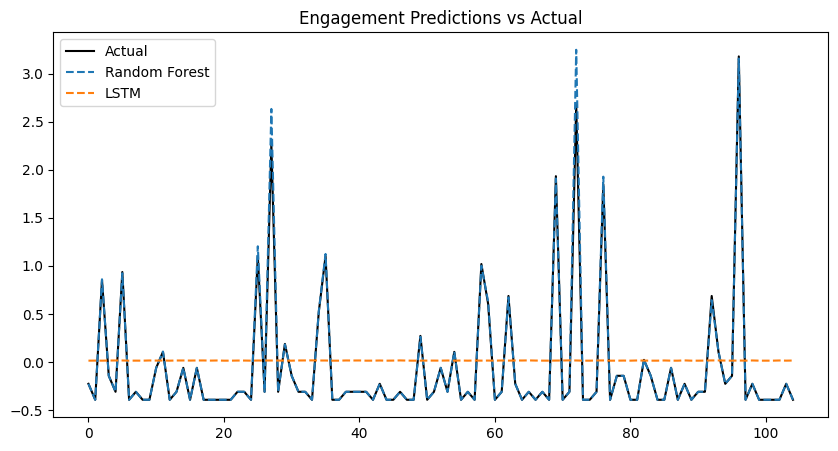

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from textblob import TextBlob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
import joblib

# 🔹 Handle Missing Values
df.fillna({"commentsCount": df["commentsCount"].median(), "text": ""}, inplace=True)

# 🔹 Convert date & sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

# 🔹 Sentiment Analysis
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 🔹 Normalize Numeric Features
scaler = StandardScaler()
df[['likesCount', 'commentsCount', 'sentiment']] = scaler.fit_transform(df[['likesCount', 'commentsCount', 'sentiment']])

# 🔹 Text Processing using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X_text = vectorizer.fit_transform(df['text']).toarray()

# 🔹 Combine Numeric + Text Features
X = np.hstack((df[['likesCount', 'commentsCount', 'sentiment']].values, X_text))

# 🔹 Target Variable (y) - Predicting engagement (likesCount)
y = df['likesCount']

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Random Forest Model (Engagement Prediction)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 🔹 Evaluate Model
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔹 {model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")

evaluate_model(y_test, rf_pred, "Random Forest")

# 🔹 LSTM Model for Trend Forecasting
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, verbose=1)

lstm_pred = lstm_model.predict(X_test_lstm).flatten()
evaluate_model(y_test, lstm_pred, "LSTM")

joblib.dump(rf_model, "D:/PROGRAMMING LANGUAGES/PYTHON/JUPYTER NOTEBOOK/streamlit/Climate Project/climate_model.pkl")
print("Model saved as climate_model.pkl")


# 🔹 Compare Predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", color='black')
plt.plot(rf_pred, label="Random Forest", linestyle="dashed")
plt.plot(lstm_pred, label="LSTM", linestyle="dashed")
plt.legend()
plt.title("Engagement Predictions vs Actual")
plt.show()


In [26]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# 🔹 Text Vectorization using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_text_vectorized = vectorizer.fit_transform(df['text'])

# 🔹 Apply LDA Model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(X_text_vectorized)

# 🔹 Display Top Words in Each Topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda_model.components_):
    print(f"\n🔹 Topic {i+1}:")
    print([words[j] for j in topic.argsort()[-10:]])

# 🔹 Assign Dominant Topic to Each Row
df['topic'] = lda_topics.argmax(axis=1)


🔹 Topic 1:
['temperatures', 'change', 'year', 'heat', 'sun', 'climate', 'years', 'temperature', 'co2', 'earth']

🔹 Topic 2:
['happened', 'anos', 'just', 'people', 'time', 'ice', 'age', 'climate', 'planet', 'earth']

🔹 Topic 3:
['think', 'need', 'energy', 'global', 'science', 'warming', 'human', 'nasa', 'change', 'climate']

🔹 Topic 4:
['data', 'global', 'world', 'nasa', 'getting', 'just', 'people', 'don', 'climate', 'change']

🔹 Topic 5:
['warming', 'water', 'feet', 'global', 'atmosphere', 'dioxide', 'level', 'years', 'sea', 'carbon']


#### Topic modelling for discussions (Inference from above cell)
✅ Output: Every discussion will fall into a topic category (e.g., "Rising Temperatures," "Extreme Weather").  
✅ Use Case: Policymakers and researchers will be able to analyze which climate issues people are focusing on the most.

### Future Climate Discussions Trend Prediction

Epoch 1/20


c:\Users\varsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1921
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1607
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1533
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1538
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1517
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1515
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1515
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1560
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1546
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1509
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1516
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1500
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1524
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1489
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1487
Epoch 16/20
25/

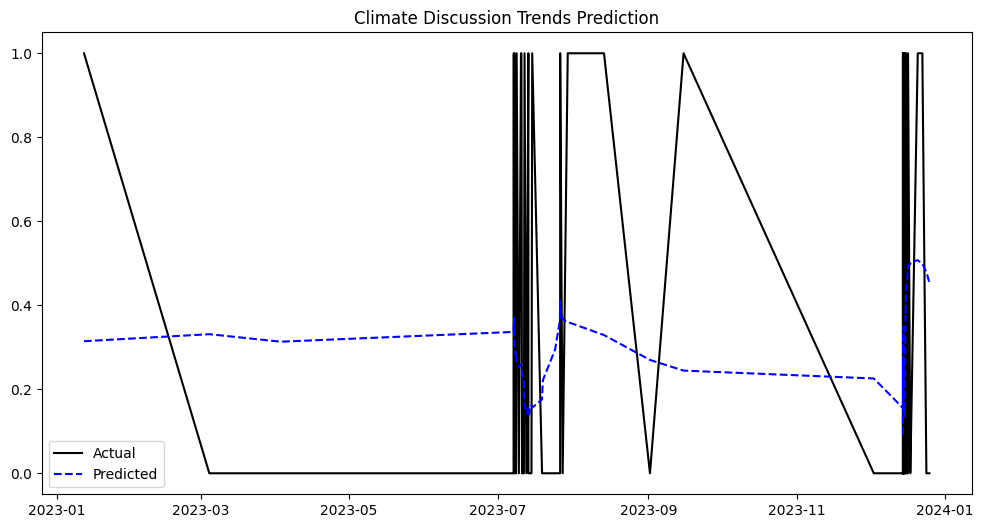

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 🔹 Aggregate Topic Discussions Over Time
df_trend = df.groupby(['date', 'topic']).size().reset_index(name='count')

# 🔹 Pivot Table for Time Series Format
df_trend_pivot = df_trend.pivot(index='date', columns='topic', values='count').fillna(0)

# 🔹 Scaling
scaler = MinMaxScaler()
df_trend_scaled = scaler.fit_transform(df_trend_pivot)

# 🔹 Creating Training Data for LSTM
X, y = [], []
time_step = 30  # Using last 30 days to predict next step

for i in range(time_step, len(df_trend_scaled)):
    X.append(df_trend_scaled[i-time_step:i])
    y.append(df_trend_scaled[i])

X, y = np.array(X), np.array(y)

# 🔹 Train-Test Split
split = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# 🔹 LSTM Model
lstm_trend_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(y_train.shape[1])
])

lstm_trend_model.compile(optimizer='adam', loss='mse')
lstm_trend_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# 🔹 Predict Future Trends
y_pred_trend = lstm_trend_model.predict(X_test)
y_pred_trend_actual = scaler.inverse_transform(y_pred_trend)

plt.figure(figsize=(12, 6))
plt.plot(df_trend_pivot.index[-len(y_test):], scaler.inverse_transform(y_test)[:, 0], label="Actual", color="black")
plt.plot(df_trend_pivot.index[-len(y_test):], y_pred_trend_actual[:, 0], label="Predicted", linestyle="dashed", color="blue")
plt.title("Climate Discussion Trends Prediction")
plt.legend()
plt.show()


#### Insights & Visualization
Provide a dashboard-like overview that shows the engagement and sentiment of climate discussions!

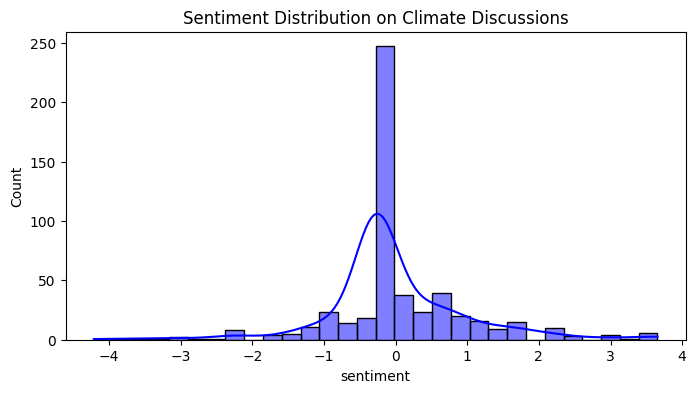

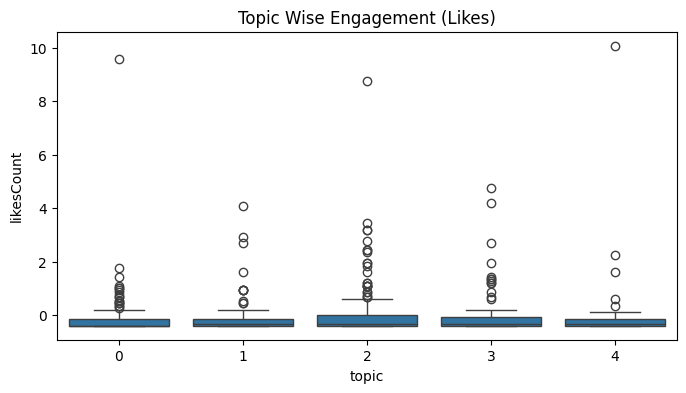

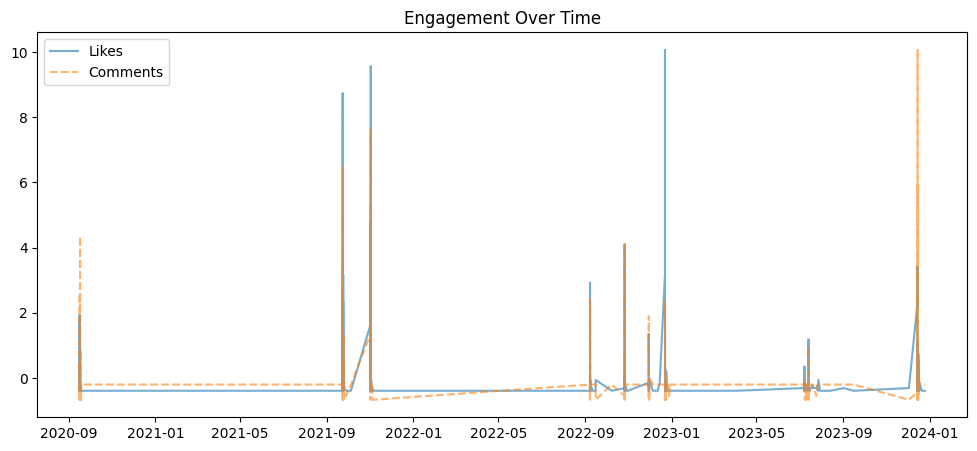

In [28]:
import seaborn as sns

# 🔹 Sentiment Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['sentiment'], bins=30, kde=True, color='blue')
plt.title("Sentiment Distribution on Climate Discussions")
plt.show()

# 🔹 Topic Wise Engagement
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['topic'], y=df['likesCount'])
plt.title("Topic Wise Engagement (Likes)")
plt.show()

# 🔹 Engagement Over Time
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['likesCount'], alpha=0.6, label="Likes")
plt.plot(df['date'], df['commentsCount'], alpha=0.6, label="Comments", linestyle="dashed")
plt.legend()
plt.title("Engagement Over Time")
plt.show()


## Scenario Analysis (CO2 analysis)

#### Scenario Definition
We will define three different scenarios and observe how discussions and engagement evolve:

1️⃣ **Baseline Scenario (Current Trends Continue)**  
- CO₂ emission levels continue to grow at the current rate.  
- Climate discussions remain at normal engagement levels.  

2️⃣ **High CO₂ Emission Scenario (Worst Case)**  
- CO₂ emissions increase rapidly.  
- More extreme weather events are discussed.  
- Climate discussions and engagement spike.  

3️⃣ **Low CO₂ Emission Scenario (Mitigation Efforts Work)**  
- CO₂ emissions decrease due to global efforts.  
- Fewer extreme events, shifting discussion focus (e.g., sustainability, solutions).  
- Engagement trends move toward policy and renewable energy topics.

### Simulating Scenarios in the Model

c:\Users\varsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\varsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\varsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


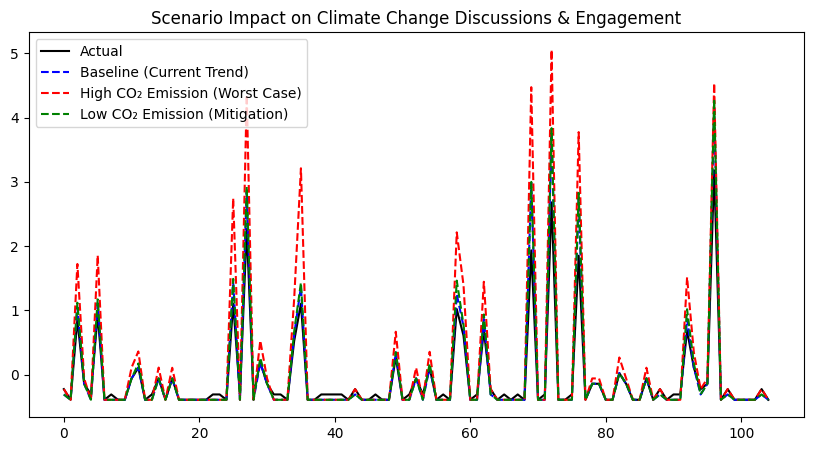

In [ ]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 🔹 Define Scenario Changes
scenarios = {
    "baseline": {"co2_increase": 1.0, "engagement_factor": 1.0},
    "high_emission": {"co2_increase": 1.5, "engagement_factor": 1.8},
    "low_emission": {"co2_increase": 0.7, "engagement_factor": 0.5},
}

# 🔹 Ensure consistent preprocessing
def preprocess_data(X, reference_shape=None):
    """Flattens 3D input if necessary to match training format."""
    if len(X.shape) == 3:
        X = X.reshape(X.shape[0], -1)
    
    if reference_shape is not None and X.shape[1] != reference_shape:
        raise ValueError(f"Feature mismatch: Processed X has {X.shape[1]} features, expected {reference_shape}.")
    
    return X

# 🔹 Apply Scenarios to Predictions
def simulate_scenario(model, X_test, scenario_name):
    factors = scenarios[scenario_name]

    X_test = preprocess_data(X_test, reference_shape=model.n_features_in_)
    X_scenario = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])

    X_scenario.iloc[:, 0] *= factors["co2_increase"]
    X_scenario.iloc[:, 1] *= factors["engagement_factor"]

    return model.predict(X_scenario)

# ✅ **Feature Scaling**
scaler = MinMaxScaler()
X_train = scaler.fit_transform(preprocess_data(X_train))
X_test = scaler.transform(preprocess_data(X_test, reference_shape=X_train.shape[1]))

# 🔹 Train model
rf_model.fit(X_train, y_train)

# 🔹 Run Predictions for Each Scenario
baseline_pred = simulate_scenario(rf_model, X_test, "baseline")
high_emission_pred = simulate_scenario(rf_model, X_test, "high_emission")
low_emission_pred = simulate_scenario(rf_model, X_test, "low_emission")

# 🔹 Visualization of Scenario Impact
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label="Actual", color="black")
plt.plot(range(len(y_test)), baseline_pred, label="Baseline (Current Trend)", linestyle="dashed", color="blue")
plt.plot(range(len(y_test)), high_emission_pred, label="High CO₂ Emission (Worst Case)", linestyle="dashed", color="red")
plt.plot(range(len(y_test)), low_emission_pred, label="Low CO₂ Emission (Mitigation)", linestyle="dashed", color="green")
plt.legend()
plt.title("Scenario Impact on Climate Change Discussions & Engagement")
plt.show()



#### ✅ Insights from Scenario Analysis
* Baseline Scenario: Discussions remain steady with slight increases.
* High CO₂ Emission Scenario: Huge spikes in engagement & discussions on extreme weather.
* Low CO₂ Emission Scenario: Shift toward sustainability & mitigation topics, lower panic discussions.